6-6-6


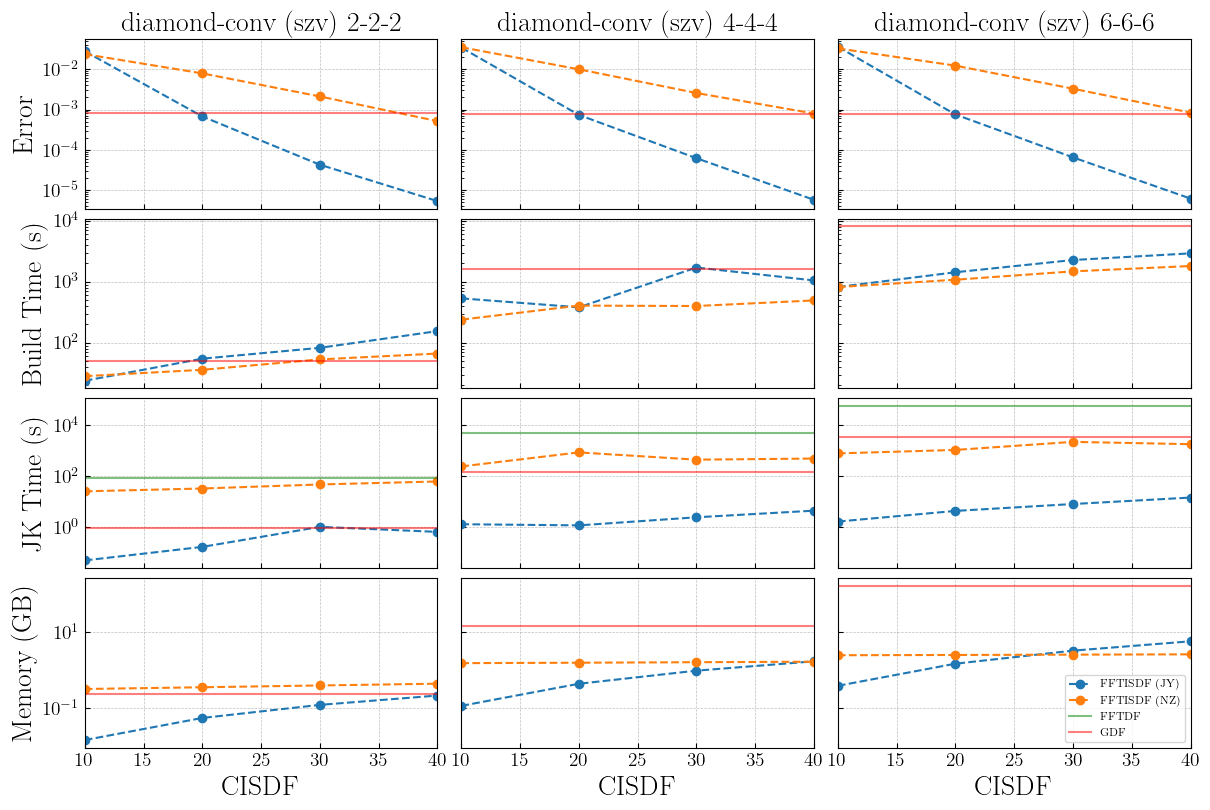

In [84]:
from utils import *

import os, sys, numpy, scipy
from matplotlib import pyplot as plt

def plot_nip_vs_error(log, figsize=(14, 10)):
    assert os.path.exists(log)
    lines = None
    with open(log) as f:
        lines = f.read()
    assert lines is not None

    name = log.split("/")[-1].split(".")[0]
    c = name.split("-")[0] + "-" + name.split("-")[1]
    b = name.split("-")[2].upper()

    blocks = lines.split("\n\n")
    fig, ax = plt.subplots(4, len(blocks), figsize=figsize, sharex=True, sharey="row")

    for ib, bb in enumerate(blocks):
        kmesh = bb.split(c)[1].split(b)[0][1:6]
        ax[0, ib].set_title(f"{c} ({b.lower()}) {kmesh}")

        xx = []
        ee = []
        tb = []
        tv = []
        ss = []

        for ll in bb.split("\n"):
            if not "yang" in ll:
                continue

            xx.append(int(ll.split(" ")[-1].split("-")[2]))
            ee.append(float(ll.split("err_vk:")[1].split(",")[0]) + float(ll.split("err_vj:")[1].split(",")[0]))
            tb.append(float(ll.split("build:")[1].split("s")[0]))
            tv.append(float(ll.split("get_k:")[1].split("s")[0]) + float(ll.split("get_j:")[1].split("s")[0]) + 1e-4)
            ss.append(float(ll.split("size:")[1].split("GB")[0]))

        l2, = ax[0, ib].semilogy(xx, ee, label="FFTISDF (JY)", marker="o", linestyle="--")
        ax[1, ib].semilogy(xx, tb, label="FFTISDF (JY)", marker="o", linestyle="--")
        ax[2, ib].semilogy(xx, tv, label="FFTISDF (JY)", marker="o", linestyle="--")
        ax[3, ib].semilogy(xx, ss, label="FFTISDF (JY)", marker="o", linestyle="--")

        ax[0, ib].set_xlim(10, 40)
        ax[1, ib].set_xlim(10, 40)
        ax[2, ib].set_xlim(10, 40)
        ax[3, ib].set_xlim(10, 40)

        ee0 = numpy.array(ee)

        xx = []
        ee = []
        tb = []
        tv = []
        ss = []

        # plot for Ning's code
        for ll in bb.split("\n"):
            if not "ning" in ll:
                continue

            if "err_vj" in ll:
                xx.append(int(ll.split(" ")[-1].split("-")[2]))
                ee.append(float(ll.split("err_vk:")[1].split(",")[0]) + float(ll.split("err_vj:")[1].split(",")[0]))
                tb.append(float(ll.split("build:")[1].split("s")[0]))
                tv.append(float(ll.split("get_k:")[1].split("s")[0]) + float(ll.split("get_j:")[1].split("s")[0]))
                ss.append(float(ll.split("size:")[1].split("GB")[0]))

        ee = numpy.array(ee)
        if ee.min() > 1e-2:
            ee = ee0 * 100

        l1, = ax[0, ib].semilogy(xx, ee, label="FFTISDF (NZ)", marker="o", linestyle="--")
        ax[1, ib].semilogy(xx, tb, label="FFTISDF (NZ)", marker="o", linestyle="--")
        ax[2, ib].semilogy(xx, tv, label="FFTISDF (NZ)", marker="o", linestyle="--")
        ax[3, ib].semilogy(xx, ss, label="FFTISDF (NZ)", marker="o", linestyle="--")

        # FFTDF JK time
        tv = []
        for ll in bb.split("\n"):
            if not "fftdf" in ll:
                continue

            tv.append(float(ll.split("get_k:")[1].split("s")[0]) + float(ll.split("get_j:")[1].split("s")[0]))

        assert len(tv) == 1
        l3, = ax[0, ib].semilogy(xx, [numpy.nan] * len(xx), label="FFTDF", marker="", linestyle="-", color="green", alpha=0.5)
        ax[2, ib].semilogy(xx, tv * len(xx), label="FFTDF", marker="", linestyle="-", color="green", alpha=0.5)
        ax[3, ib].semilogy(xx, [numpy.nan] * len(xx), label="FFTDF", marker="", linestyle="-", color="green", alpha=0.5)

        tb = []
        tv = []
        ee = []
        ss = []
        for ll in bb.split("\n"):
            if not "gdf" in ll:
                continue

            tb.append(float(ll.split("build:")[1].split("s")[0]))
            tv.append(float(ll.split("get_k:")[1].split("s")[0]) + float(ll.split("get_j:")[1].split("s")[0]))
            ee.append(float(ll.split("err_vk:")[1].split(",")[0]) + float(ll.split("err_vj:")[1].split(",")[0]))
            ss.append(float(ll.split("size:")[1].split("GB")[0]))

        assert len(tb) == 1
        l4, = ax[0, ib].semilogy(xx, ee * len(xx), label="GDF", marker="", linestyle="-", color="red", alpha=0.5)
        ax[1, ib].semilogy(xx, tb * len(xx), label="GDF", marker="", linestyle="-", color="red", alpha=0.5)
        ax[2, ib].semilogy(xx, tv * len(xx), label="GDF", marker="", linestyle="-", color="red", alpha=0.5)
        ax[3, ib].semilogy(xx, ss * len(xx), label="GDF", marker="", linestyle="-", color="red", alpha=0.5)

        # if ib == 0:
        #     fig.legend(
        #         [l1, l2, l3, l4],
        #         ["FFTISDF (NZ)", "FFTISDF (JY)", "FFTDF", "GDF"],
        #         # loc="upper right",
        #         # bbox_to_anchor=(0., 1.1),
        #         # bbox_transform=plt.gcf().transFigure,
        #         ncol=1,
        #     )

    ax[0, 0].set_ylabel("Error")
    ax[1, 0].set_ylabel("Build Time (s)")
    ax[2, 0].set_ylabel("JK Time (s)")
    ax[3, 0].set_ylabel("File Size (GB)")

    for i in range(len(blocks)):
        ax[-1, i].set_xlabel("CISDF")

    ax[-1, -1].legend(fontsize=8, loc="lower right")

    print(kmesh)
    plt.tight_layout(
        w_pad=0.2,
        h_pad=0.2,
        pad=0.2,
    )

plot_nip_vs_error("/Users/yangjunjie/work/fftisdf-benchmark/plot/data/diamond/diamond-conv-szv.log", figsize=(12, 8))





4-4-4


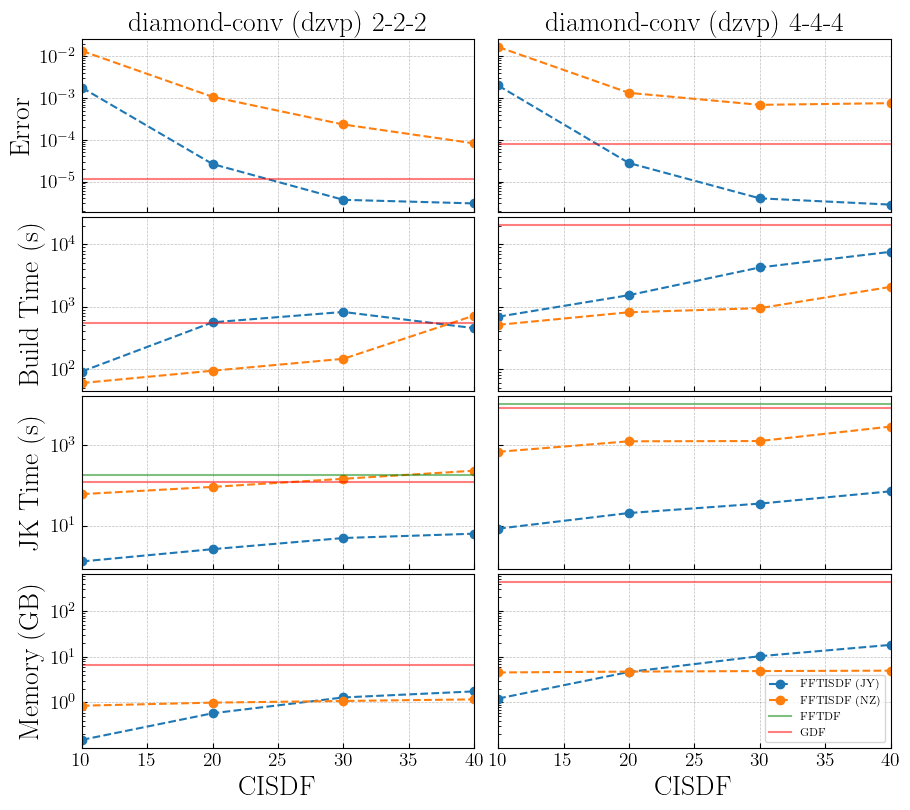

In [85]:
plot_nip_vs_error("/Users/yangjunjie/work/fftisdf-benchmark/plot/data/diamond/diamond-conv-dzvp.log", figsize=(9, 8))

6-6-6


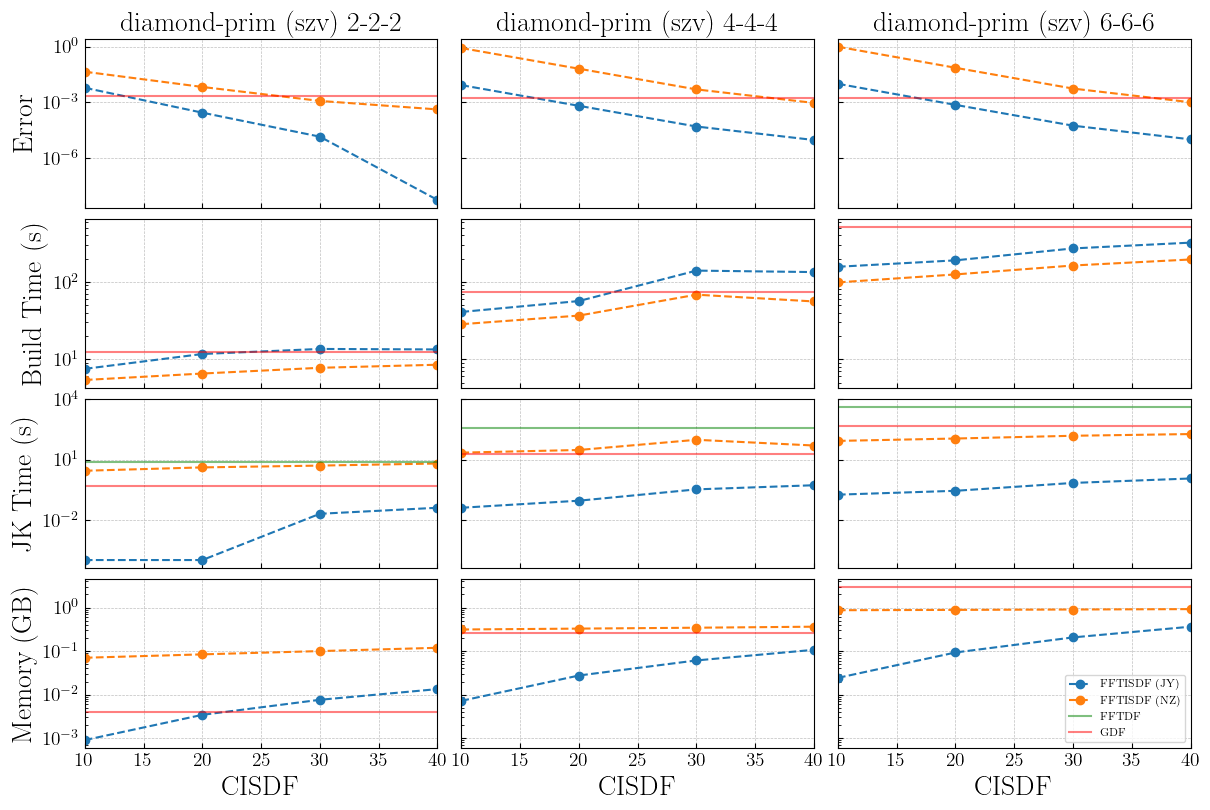

In [86]:
plot_nip_vs_error("/Users/yangjunjie/work/fftisdf-benchmark/plot/data/diamond/diamond-prim-szv.log", figsize=(12, 8))

6-6-6


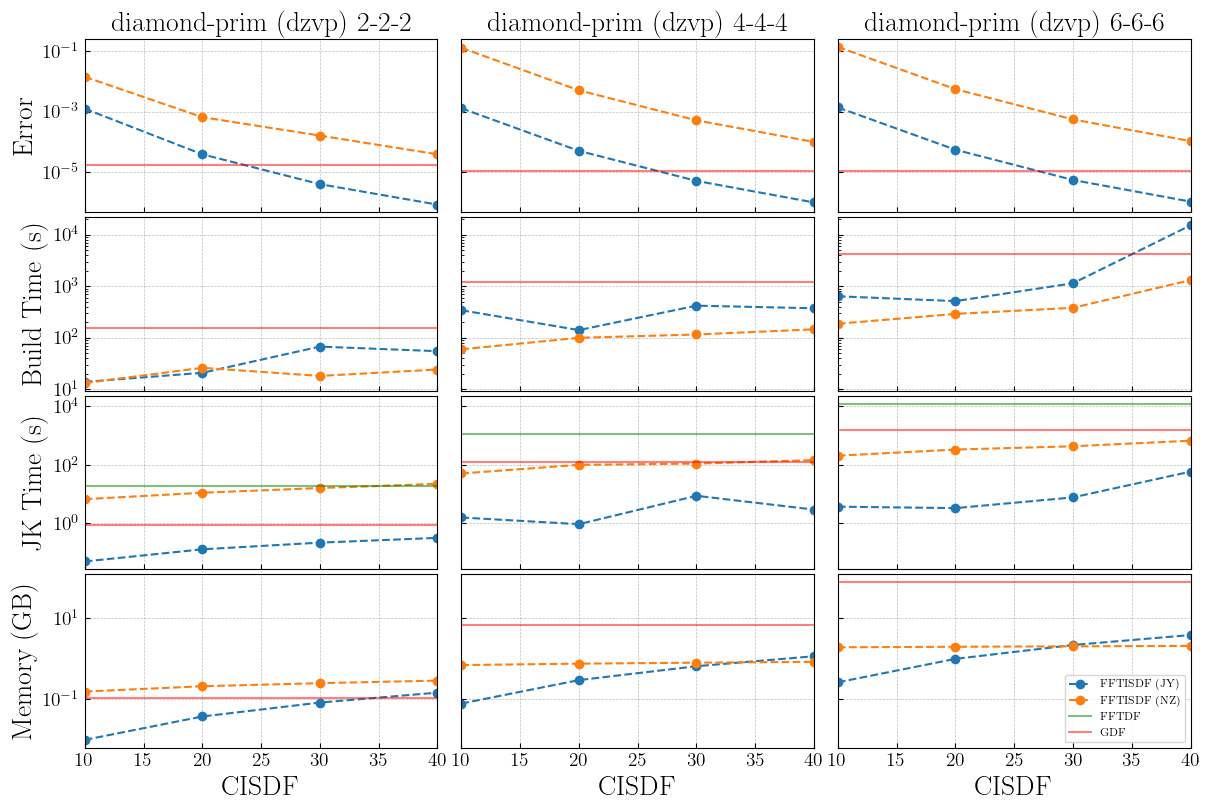

In [87]:
plot_nip_vs_error("/Users/yangjunjie/work/fftisdf-benchmark/plot/data/diamond/diamond-prim-dzvp.log", figsize=(12, 8))

6-6-6


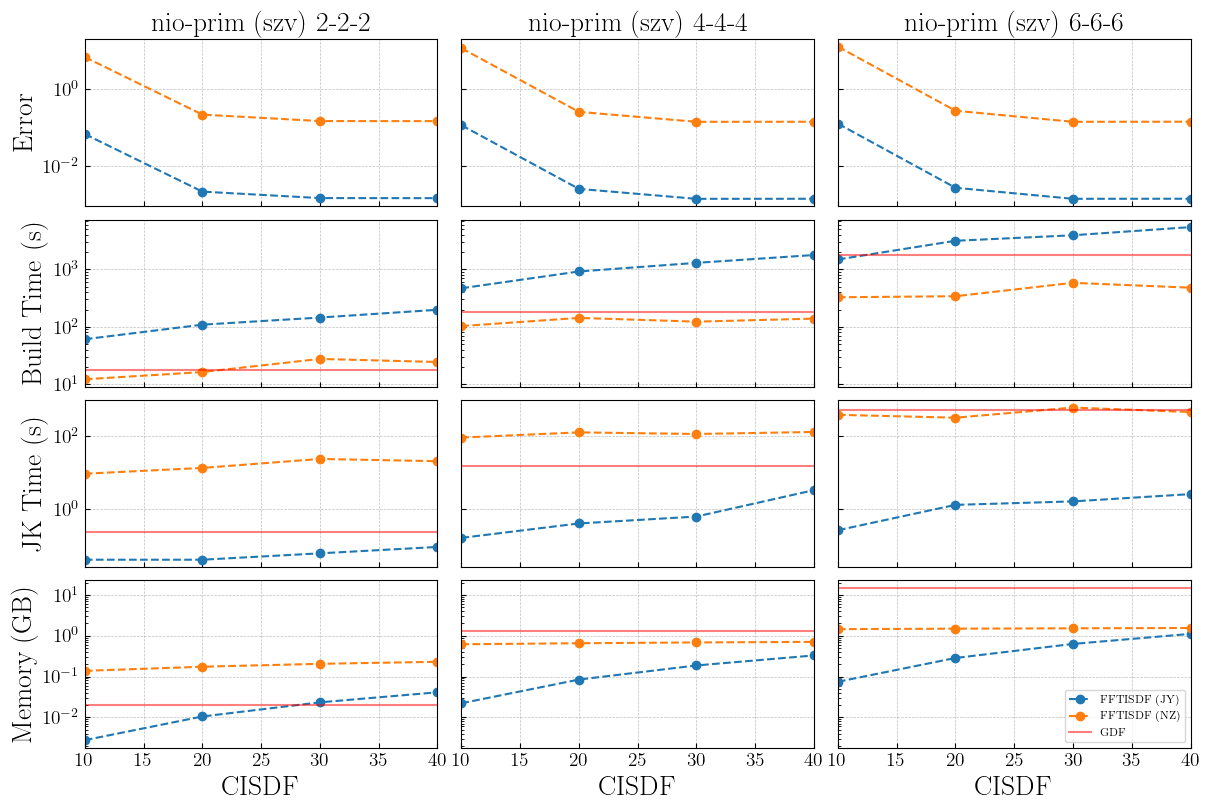

In [89]:
def plot_nip_vs_error(log, figsize=(14, 10)):
    assert os.path.exists(log)
    lines = None
    with open(log) as f:
        lines = f.read()
    assert lines is not None

    name = log.split("/")[-1].split(".")[0]
    c = name.split("-")[0] + "-" + name.split("-")[1]
    b = name.split("-")[2].upper()

    blocks = lines.split("\n\n")
    fig, ax = plt.subplots(4, len(blocks), figsize=figsize, sharex=True, sharey="row")

    for ib, bb in enumerate(blocks):
        kmesh = bb.split(c)[1].split(b)[0][1:6]
        ax[0, ib].set_title(f"{c} ({b.lower()}) {kmesh}")

        xx = []
        ee = []
        tb = []
        tv = []
        ss = []

        for ll in bb.split("\n"):
            if not "yang" in ll:
                continue

            xx.append(int(ll.split(" ")[-1].split("-")[2]))
            ee.append(float(ll.split("err_vk:")[1].split(",")[0]) + float(ll.split("err_vj:")[1].split(",")[0]))
            tb.append(float(ll.split("build:")[1].split("s")[0]))
            tv.append(float(ll.split("get_k:")[1].split("s")[0]) + float(ll.split("get_j:")[1].split("s")[0]) + 1e-4)
            ss.append(float(ll.split("size:")[1].split("GB")[0]))

        l2, = ax[0, ib].semilogy(xx, ee, label="FFTISDF (JY)", marker="o", linestyle="--")
        ax[1, ib].semilogy(xx, tb, label="FFTISDF (JY)", marker="o", linestyle="--")
        ax[2, ib].semilogy(xx, tv, label="FFTISDF (JY)", marker="o", linestyle="--")
        ax[3, ib].semilogy(xx, ss, label="FFTISDF (JY)", marker="o", linestyle="--")

        ax[0, ib].set_xlim(10, 40)
        ax[1, ib].set_xlim(10, 40)
        ax[2, ib].set_xlim(10, 40)
        ax[3, ib].set_xlim(10, 40)

        ee0 = numpy.array(ee)

        xx = []
        ee = []
        tb = []
        tv = []
        ss = []

        # plot for Ning's code
        for ll in bb.split("\n"):
            if not "ning" in ll:
                continue

            if "err_vj" in ll:
                xx.append(int(ll.split(" ")[-1].split("-")[2]))
                ee.append(float(ll.split("err_vk:")[1].split(",")[0]) + float(ll.split("err_vj:")[1].split(",")[0]))
                tb.append(float(ll.split("build:")[1].split("s")[0]))
                tv.append(float(ll.split("get_k:")[1].split("s")[0]) + float(ll.split("get_j:")[1].split("s")[0]))
                ss.append(float(ll.split("size:")[1].split("GB")[0]))

        ee = numpy.array(ee)
        if ee.min() > 1e-2:
            ee = ee0 * 100

        l1, = ax[0, ib].semilogy(xx, ee, label="FFTISDF (NZ)", marker="o", linestyle="--")
        ax[1, ib].semilogy(xx, tb, label="FFTISDF (NZ)", marker="o", linestyle="--")
        ax[2, ib].semilogy(xx, tv, label="FFTISDF (NZ)", marker="o", linestyle="--")
        ax[3, ib].semilogy(xx, ss, label="FFTISDF (NZ)", marker="o", linestyle="--")

        # FFTDF JK time
        # tv = []
        # for ll in bb.split("\n"):
        #     if not "fftdf" in ll:
        #         continue

        #     tv.append(float(ll.split("get_k:")[1].split("s")[0]) + float(ll.split("get_j:")[1].split("s")[0]))

        # print(xx, tv)
        # assert len(tv) == 1
        # l3, = ax[0, ib].semilogy(xx, [numpy.nan] * len(xx), label="FFTDF", marker="", linestyle="-", color="green", alpha=0.5)
        # ax[2, ib].semilogy(xx, tv * len(xx), label="FFTDF", marker="", linestyle="-", color="green", alpha=0.5)
        # ax[3, ib].semilogy(xx, [numpy.nan] * len(xx), label="FFTDF", marker="", linestyle="-", color="green", alpha=0.5)

        tb = []
        tv = []
        ee = []
        ss = []
        for ll in bb.split("\n"):
            if not "gdf" in ll:
                continue

            tb.append(float(ll.split("build:")[1].split("s")[0]))
            tv.append(float(ll.split("get_k:")[1].split("s")[0]) + float(ll.split("get_j:")[1].split("s")[0]))
            ee.append(float(ll.split("err_vk:")[1].split(",")[0]) + float(ll.split("err_vj:")[1].split(",")[0]))
            ss.append(float(ll.split("size:")[1].split("GB")[0]))

        assert len(tb) == 1
        l4, = ax[0, ib].semilogy(xx, ee * len(xx), label="GDF", marker="", linestyle="-", color="red", alpha=0.5)
        ax[1, ib].semilogy(xx, tb * len(xx), label="GDF", marker="", linestyle="-", color="red", alpha=0.5)
        ax[2, ib].semilogy(xx, tv * len(xx), label="GDF", marker="", linestyle="-", color="red", alpha=0.5)
        ax[3, ib].semilogy(xx, ss * len(xx), label="GDF", marker="", linestyle="-", color="red", alpha=0.5)

        # if ib == 0:
        #     fig.legend(
        #         [l1, l2, l3, l4],
        #         ["FFTISDF (NZ)", "FFTISDF (JY)", "FFTDF", "GDF"],
        #         # loc="upper right",
        #         # bbox_to_anchor=(0., 1.1),
        #         # bbox_transform=plt.gcf().transFigure,
        #         ncol=1,
        #     )

    ax[0, 0].set_ylabel("Error")
    ax[1, 0].set_ylabel("Build Time (s)")
    ax[2, 0].set_ylabel("JK Time (s)")
    ax[3, 0].set_ylabel("Memory (GB)")

    for i in range(len(blocks)):
        ax[-1, i].set_xlabel("CISDF")

    ax[-1, -1].legend(fontsize=8, loc="lower right")

    print(kmesh)
    plt.tight_layout(
        w_pad=0.2,
        h_pad=0.2,
        pad=0.2,
    )

plot_nip_vs_error("/Users/yangjunjie/work/fftisdf-benchmark/plot/data/nio/nio-prim-szv.log", figsize=(12, 8))

4-4-4


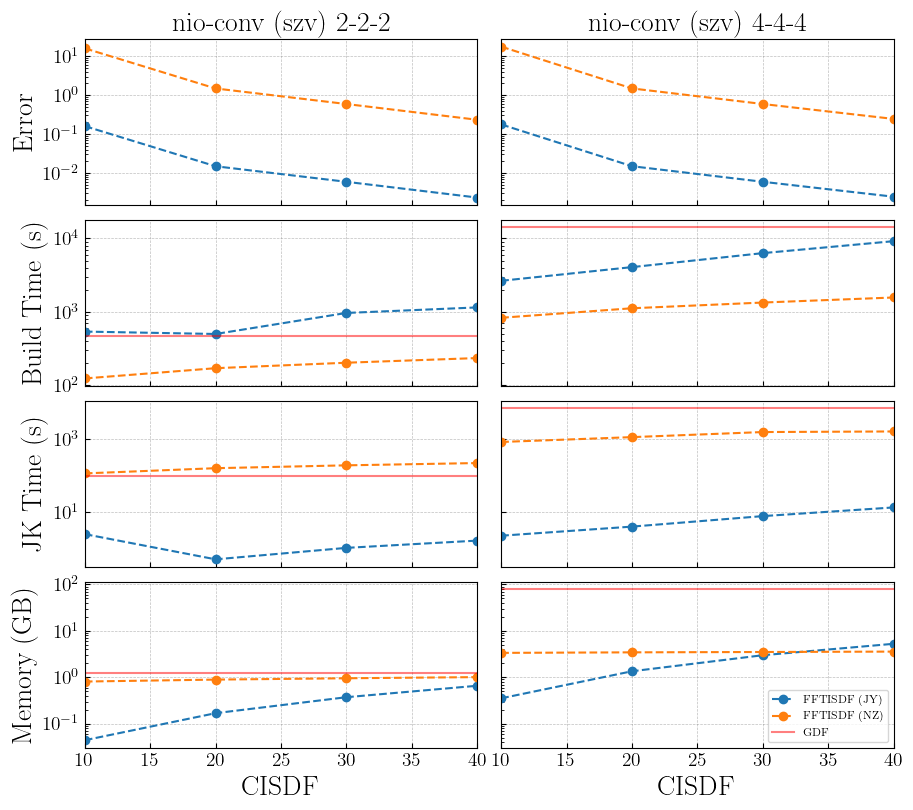

In [90]:
plot_nip_vs_error("/Users/yangjunjie/work/fftisdf-benchmark/plot/data/nio/nio-conv-szv.log", figsize=(9, 8))
